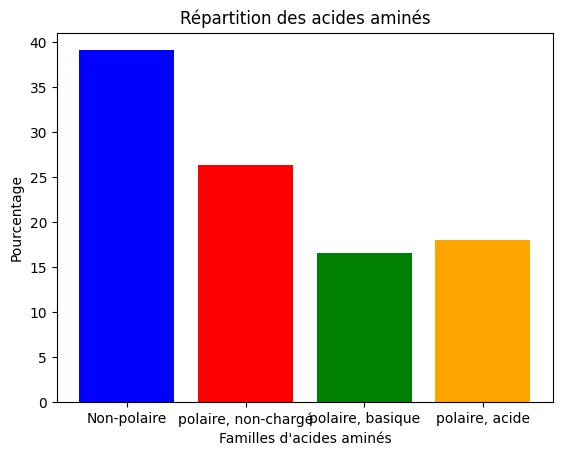

In [1]:
from Bio import SeqIO
from Bio.SeqUtils.ProtParam import ProteinAnalysis
import matplotlib.pyplot as plt

protFile = open("../z.misc_files/data_seq/h.sapiens.cttn.iso.a.aa.fa","r")

#
# SeqIO.parse retourne un itérateur mais ici, on sait que le fichier 
# ne contient qu'une seule séquence...
#
for record in SeqIO.parse(protFile, "fasta"):
  #
  # On s'assure que le format FASTA est respecté... 
  #
  if record is not None:
    #
    # L'objet record de type Seq enferme la séquence dans l'item seq
    #
    protAnalysis = ProteinAnalysis(record.seq)
    #
    # Je prépare le terrain... Comme on veut faire un calcul de  
    # distribution, on va avoir besoin de la longueur totale de la protéines
    sizeTotal = len(record.seq)
  else:
    print("Votre séquence n'est pas en format FASTA...")
#
# La méthode count_amino_acids() retourne un dictionnaire
#
allAA = protAnalysis.count_amino_acids()
#
# On a la totalité des acides aminés de la protéine
# en mémoire mais nous n'avons pas leur appartenance à
# une famille... Il nous faut définir les familles.
#
# Tiré de Campbell, 5ème édition 
# 
# Non-polaires	            (A+F+G+I+L+M+P+V+W)
np = {
    "A":0,
    "F":0,
    "G":0,
    "I":0,
    "L":0,
    "M":0,
    "P":0,
    "V":0,
    "W":0,
    "total":0
}
# Polaires, non-chargés		(C+N+Q+S+T+Y)
pnc = {
    "C":0,
    "N":0,
    "Q":0,
    "S":0,
    "T":0,
    "Y":0,
    "total":0
}
# Polaires, basiques        (H+K+R)
pb = {
    "H":0,
    "K":0,
    "R":0,
    "total":0
}
# Polaires, acides	        (D+E)
pa = {
    "D":0,
    "E":0,
    "total":0
}
#
# On traverse le dictionnaire allAA pour faire le tri et
# distribuer les acides aminés dans les bonnes familles
#
# Voici pourquoi j'ai ajouté une clé "total" :-)
#
for aa in allAA:
  if aa in np:
    np[aa] = allAA[aa]
    np["total"] = np["total"]+allAA[aa]
  elif aa in pnc:
    pnc[aa] = allAA[aa]
    pnc["total"] = pnc["total"]+allAA[aa]
  elif aa in pb:
    pb[aa] = allAA[aa]
    pb["total"] = pb["total"]+allAA[aa]
  elif aa in pa:
    pa[aa] = allAA[aa]
    pa["total"] = pa["total"]+allAA[aa]

#
# À partir de maintenant, on va jouer avec les nombres pour 
# créer les valeurs nécessaires à construire notre graphe
#
np_percent = (np["total"]/sizeTotal)*100
pnc_percent = (pnc["total"]/sizeTotal)*100
pb_percent = (pb["total"]/sizeTotal)*100
pa_percent = (pa["total"]/sizeTotal)*100

var = ["Non-polaire","polaire, non-chargé","polaire, basique","polaire, acide"]
val = [np_percent,pnc_percent,pb_percent,pa_percent]
col_colors = ["blue","red","green","orange"]

plt.bar(var, val, color=col_colors)
plt.title("Répartition des acides aminés")
plt.xlabel("Familles d'acides aminés")
plt.ylabel("Pourcentage")
#
# Il faut mettre la fonction savefig() avant la fonction show()
# car celle-ci ré-initialise tout et notre fichier serait vide...
#
plt.savefig("../z.misc_files/data_misc/distribution_aa.jpg")
plt.show()